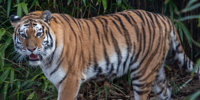

In [2]:
from fastbook import *
from fastai.vision.widgets import *

urls=search_images_ddg('tiger')
len(urls)
dest = 'image/tiger.jpg'
download_url(urls[0], dest)

im = Image.open(dest)
im.to_thumb(200,200)

In [3]:
bear_types = 'tiger','snake','apple'
path = Path('tigers')

In [4]:
if not path.exists():
    path.mkdir(parents=True ,exist_ok=True)
    
    for o in tiger:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} tiger')
        download_images(dest, urls=results[:50])
        resize_images(dest,max_size=400,dest=dest)

In [46]:
fns = get_image_files(path)
fns

(#95) [Path('tigers/apple/3342f79d-d11d-49ba-a1e7-449791bd62c1.jpg'),Path('tigers/apple/64594817-f013-4033-9564-14c1c96ca529.jpg'),Path('tigers/apple/77471cfb-d7a2-4dd6-a35f-ac83e5af818d.jpg'),Path('tigers/apple/a716346f-f9de-441b-9860-e8f07a01c27c.jpg'),Path('tigers/apple/ffe1e21a-9d62-4a02-8aa6-c04f8f592f96.jpg'),Path('tigers/snake/066f2a65-b88b-44da-85af-01b8f6f4558b.jpg'),Path('tigers/snake/0d6d9d4a-d6c0-4bb7-958b-1f22f35952a4.jpg'),Path('tigers/snake/1a6f7f75-476f-466e-aaad-540f43394c12.jpg'),Path('tigers/snake/234825c9-32f0-4c41-bc17-2a67b07f9df7.jpg'),Path('tigers/snake/287539e5-7b8a-41c4-8ea9-ce85f7ca024a.jpg')...]

In [47]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [ ]:
tigers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = tigers.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
tigers = tigers.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = tigers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
tigers = tigers.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = tigers.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
tigers = tigers.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = tigers.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
tigers = tigers.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = tigers.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [49]:
tigers = tigers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = tigers.dataloaders(path)

In [50]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.806241,1.802629,0.631579,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.512325,1.413504,0.578947,00:16
1,1.594337,0.904409,0.421053,00:16
2,1.422390,0.711182,0.210526,00:16
3,1.245715,0.751822,0.105263,00:16
4,1.082487,0.840839,0.105263,00:16
5,0.927604,0.909582,0.105263,00:16
6,0.800876,0.958168,0.105263,00:16
7,0.700275,0.998967,0.105263,00:16
8,0.629595,1.020125,0.157895,00:16
9,0.566531,1.011548,0.157895,00:16


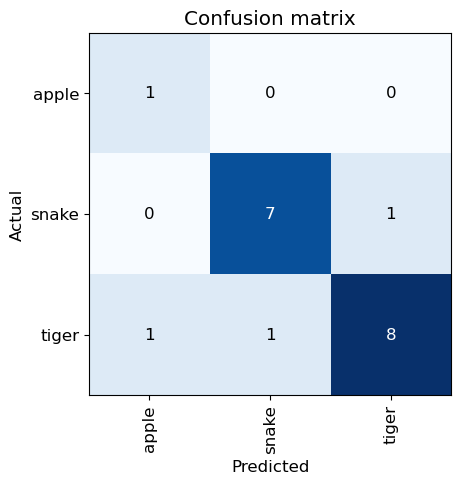

In [51]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

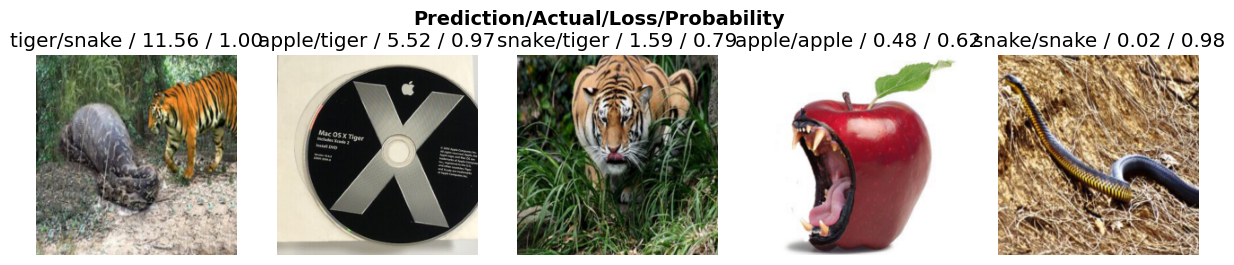

In [52]:
interp.plot_top_losses(5, nrows=1)

In [28]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [44]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [45]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)